# Weather Forecast Algorithm

## Import Data

In [1]:
import numpy as np
import pandas as pd

#### Importing Atmospheric Pressure Data

In [2]:
filename = 'NigerianData/AtmosphericPressure_pascal.xlsx'
atm_pressure_df = pd.read_excel(filename)
atm_pressure_df.head()

,Month,DAY,2018,2019,2020
0,Jan,1,1019.5,1019.3,1019.8
1,Jan,2,1019.6,1019.6,1021.6
2,Jan,3,1019.9,1022.3,1021.8
3,Jan,4,1021.4,1021.0,1021.6
4,Jan,5,1021.2,1020.1,1018.8


#### Importing Temperature Data

Minimum Temperature Data

In [3]:
filename = 'NigerianData/MinimumTemperature_degCelsius.xlsx'
min_temp_df = pd.read_excel(filename)
min_temp_df.head()

,Month,DAY,2018,2019,2020
0,Jan,1,16.3,18.4,14.5
1,Jan,2,16.1,19.5,13.2
2,Jan,3,15.7,18.4,12.4
3,Jan,4,16.0,19.6,12.6
4,Jan,5,14.2,20.1,13.6


Maximum Temperature Data

In [4]:
filename = 'NigerianData/MaximumTemperature_degCelsius.xlsx'
max_temp_df = pd.read_excel(filename)
max_temp_df.head()

,Month,DAY,2018,2019,2020
0,Jan,1,26.1,28.9,26.9
1,Jan,2,27.4,29.8,22.1
2,Jan,3,27.2,30.0,23.1
3,Jan,4,29.0,30.0,24.4
4,Jan,5,26.9,31.0,27.8


#### Importing Relative Humidity Data

In [5]:
filename = 'NigerianData/RelativeHumidity_Percent.xlsx'
rel_humidity_df = pd.read_excel(filename)
rel_humidity_df.head()

,Month,DAY,2018,2019,2020
0,Jan,1,25.333333,26.500000,26.416667
1,Jan,2,27.583333,30.416667,29.000000
2,Jan,3,24.416667,25.833333,27.583333
3,Jan,4,27.166667,28.000000,32.083333
4,Jan,5,29.916667,30.583333,33.583333


#### Importing Wind SPeed Data

In [6]:
filename = 'NigerianData/WindSpeed_Knot.xlsx'
wind_speed_df = pd.read_excel(filename)
wind_speed_df.head()

,Month,DAY,2018,2019,2020
0,Jan,1,9.66667,12.0,17
1,Jan,2,12,15.0,19
2,Jan,3,11.6667,10.0,16
3,Jan,4,12.3333,12.0,22
4,Jan,5,12.3333,15.0,13


## Data Visualization and Cleaning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Atmospheric Data Visualization

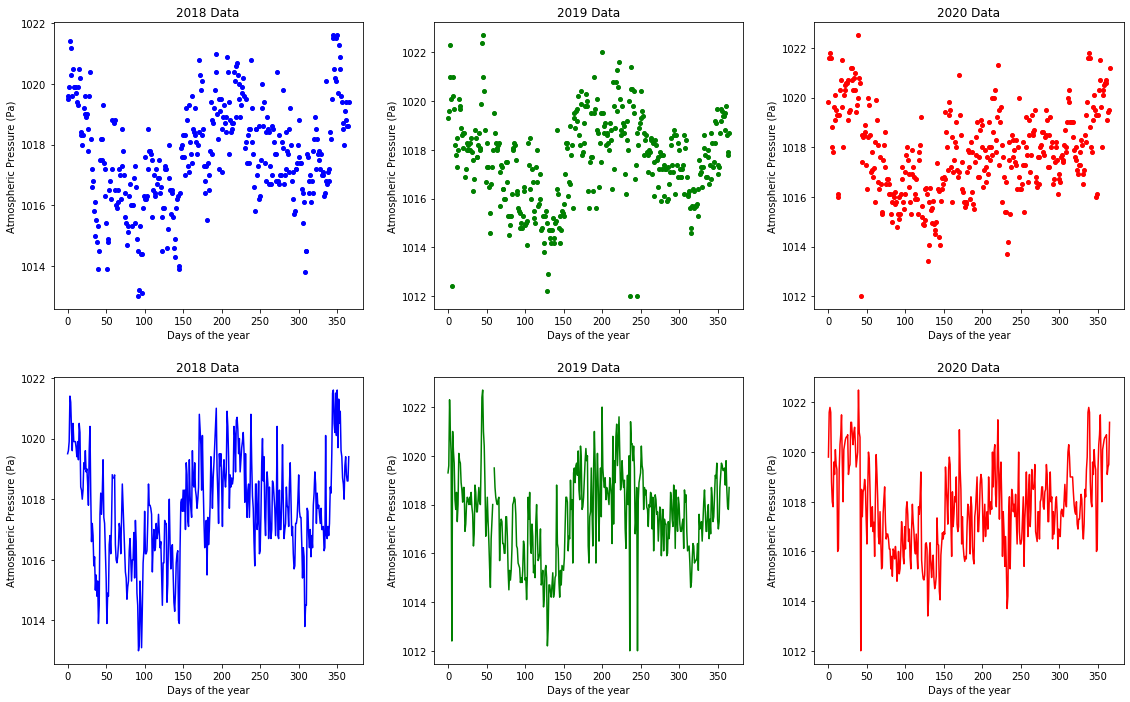

In [27]:
fig,a =  plt.subplots(1,3)

# 2018 Data Plot
plt.subplot(2, 3, 1)
plt.plot(atm_pressure_df[2018], 'bo', markersize=4)
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

plt.subplot(2, 3, 4)
plt.plot(atm_pressure_df[2018], 'b-')
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

# 2019 Data Plot
plt.subplot(2, 3, 2)
plt.plot(atm_pressure_df[2019], 'go', markersize=4)
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

plt.subplot(2, 3, 5)
plt.plot(atm_pressure_df[2019], 'g-')
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

# 2020 Data Plot
plt.subplot(2, 3, 3)
plt.plot(atm_pressure_df[2020], 'ro', markersize=4)
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

plt.subplot(2, 3, 6)
plt.plot(atm_pressure_df[2020], 'r-')
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

# Adjust Figure
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.savefig('images/AtmosphericPressurePlot-BeforeCleaning.png', dpi=100)

# Display Plot
plt.tight_layout()
plt.show()

#### Dealing with Outliers

Presence of an outlier is observed in the plots. The outliers need be removed to obtain a good model for the prediction.

##### 2018

In [9]:
list(atm_pressure_df[2018][300:320])

[1018.8,
 1017.6,
 1017.4,
 1017.4,
 1168.0,
 1015.4,
 1016.4,
 1016.1,
 1013.8,
 1014.5,
 1014.5,
 1017.7,
 1017.6,
 1016.8,
 1016.4,
 1017.0,
 1016.1,
 1016.8,
 1016.4,
 1017.8]

In [10]:
atm_pressure_df[2018][atm_pressure_df[2018] == 1168.0].index[0]

304

Obtaining the mean of ten data points around the outlier and replacing the outlier with the new value.

In [11]:
atm_pressure_df[2018][304] = np.mean( pd.concat([atm_pressure_df[2018][299:304], atm_pressure_df[2018][305:310]], axis=0) )
atm_pressure_df[2018][304]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1016.54

##### 2019

In [12]:
list(atm_pressure_df[2019][150:170])

[1015.3,
 1015.8,
 1017.0,
 1018.3,
 1018.3,
 1018.1,
 1016.1,
 1016.7,
 1016.6,
 1019.0,
 1002.0,
 1018.2,
 1015.6,
 1019.3,
 1019.5,
 1018.9,
 1019.6,
 1019.7,
 1019.2,
 1020.2]

In [13]:
atm_pressure_df[2019][atm_pressure_df[2019] == 1002.0].index[0]

160

In [14]:
atm_pressure_df[2019][160] = np.mean( pd.concat([atm_pressure_df[2019][155:160], atm_pressure_df[2019][161:166]], axis=0) )
atm_pressure_df[2019][160]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1017.8

#### Replotting the Graph after Outlier Removal

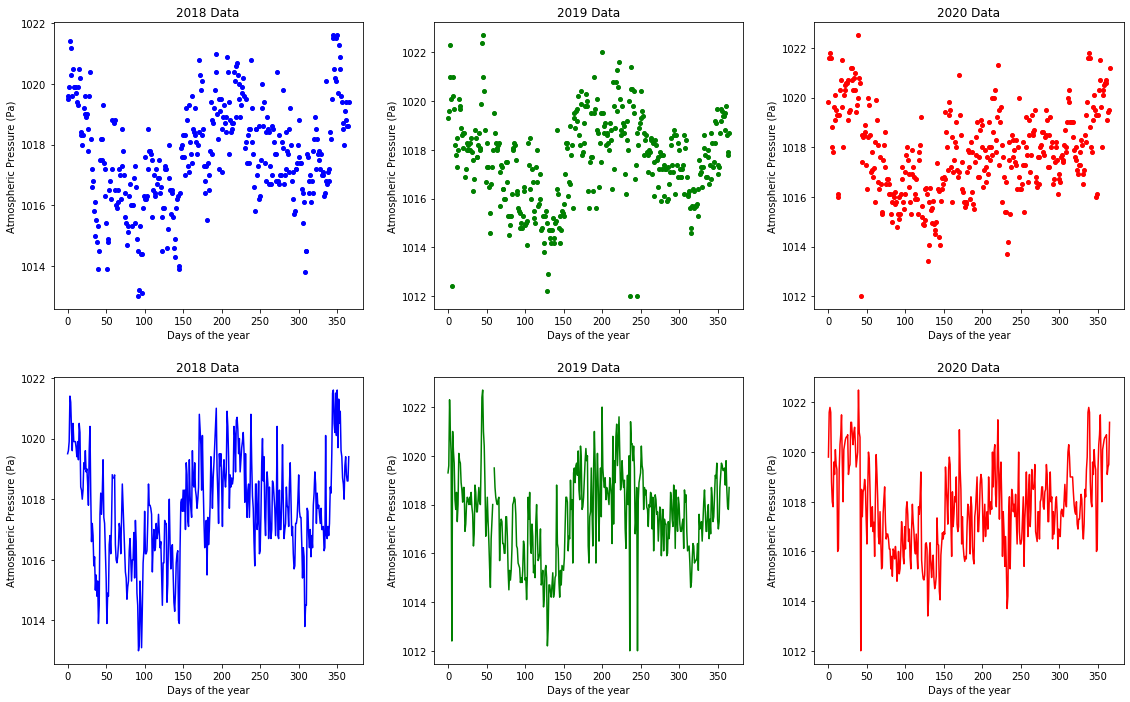

In [26]:
# plt.figure(figsize=(200, 6), dpi=80)

fig,a =  plt.subplots(1,3)

# 2018 Data Plot
plt.subplot(2, 3, 1)
plt.plot(atm_pressure_df[2018], 'bo', markersize=4)
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

plt.subplot(2, 3, 4)
plt.plot(atm_pressure_df[2018], 'b-')
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

# 2019 Data Plot
plt.subplot(2, 3, 2)
plt.plot(atm_pressure_df[2019], 'go', markersize=4)
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

plt.subplot(2, 3, 5)
plt.plot(atm_pressure_df[2019], 'g-')
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

# 2020 Data Plot
plt.subplot(2, 3, 3)
plt.plot(atm_pressure_df[2020], 'ro', markersize=4)
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

plt.subplot(2, 3, 6)
plt.plot(atm_pressure_df[2020], 'r-')
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Atmospheric Pressure (Pa)')

# Adjust Figure
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.savefig('images/AtmosphericPressurePlot-AfterCleaning.png', dpi=100)

# Display Plot
plt.tight_layout()
plt.show()

## Minimum Temperature Data Visualization

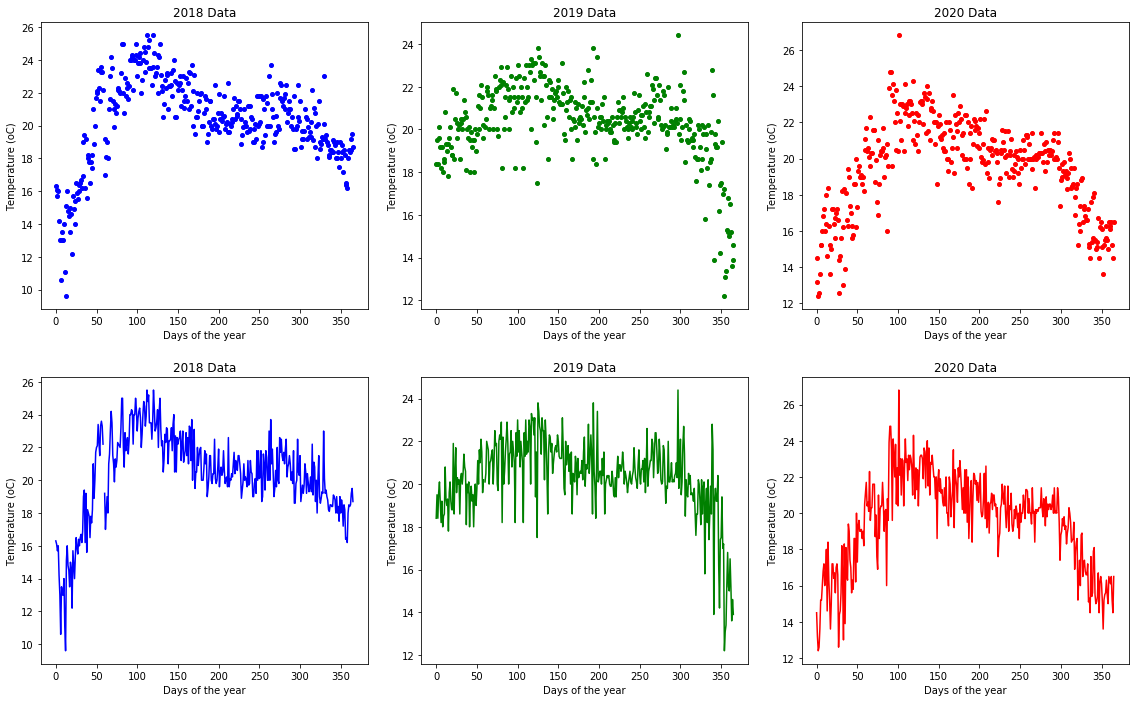

In [25]:
fig,a =  plt.subplots(1,3)

# 2018 Data Plot
plt.subplot(2, 3, 1)
plt.plot(min_temp_df[2018], 'bo', markersize=4)
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

plt.subplot(2, 3, 4)
plt.plot(min_temp_df[2018], 'b-')
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

# 2019 Data Plot
plt.subplot(2, 3, 2)
plt.plot(min_temp_df[2019], 'go', markersize=4)
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

plt.subplot(2, 3, 5)
plt.plot(min_temp_df[2019], 'g-')
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

# 2020 Data Plot
plt.subplot(2, 3, 3)
plt.plot(min_temp_df[2020], 'ro', markersize=4)
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

plt.subplot(2, 3, 6)
plt.plot(min_temp_df[2020], 'r-')
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

# Adjust Figure
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.savefig('images/MinimumTemperaturePlot-BeforeCleaning.png', dpi=100)

# Display Plot
plt.tight_layout()
plt.show()

#### Dealing with Outliers

Presence of an outlier is also observed in these plots - 2019 data and 2020 data. These outliers need be removed also to obtain to prevent bad prediction model.

##### 2019

In [17]:
list(min_temp_df[2019][20:40])

[18.8,
 21.9,
 18.6,
 20.5,
 21.7,
 19.6,
 20.3,
 20.0,
 30.2,
 18.6,
 20.3,
 20.5,
 20.0,
 20.5,
 21.4,
 20.8,
 20.6,
 18.1,
 20.0,
 19.6]

In [18]:
min_temp_df[2019][min_temp_df[2019] == 30.2].index[0]

28

Obtaining the mean of ten data points around the outlier and replacing the outlier with the new value.

In [19]:
min_temp_df[2019][28] = np.mean( pd.concat([min_temp_df[2019][23:28], min_temp_df[2019][29:34]], axis=0) )
min_temp_df[2019][28] = np.round( min_temp_df[2019][28], decimals=1 )
min_temp_df[2019][28]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


20.2

##### 2020

In [20]:
list(min_temp_df[2020][270:290])

[20.0,
 20.2,
 20.1,
 20.3,
 26.5,
 20.3,
 21.4,
 20.3,
 19.8,
 20.8,
 20.4,
 19.3,
 20.9,
 19.8,
 20.5,
 20.2,
 20.5,
 20.5,
 20.2,
 20.4]

In [21]:
min_temp_df[2020][min_temp_df[2020] == 26.5].index[0]

274

Obtaining the mean of ten data points around the outlier and replacing the outlier with the new value.

In [22]:
min_temp_df[2020][274] = np.mean( pd.concat([min_temp_df[2020][269:274], min_temp_df[2020][275:280]], axis=0) )
min_temp_df[2020][274] = np.round( min_temp_df[2020][274], decimals=1 )
min_temp_df[2020][274]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


20.3

#### Replotting the Graph after Outlier Removal

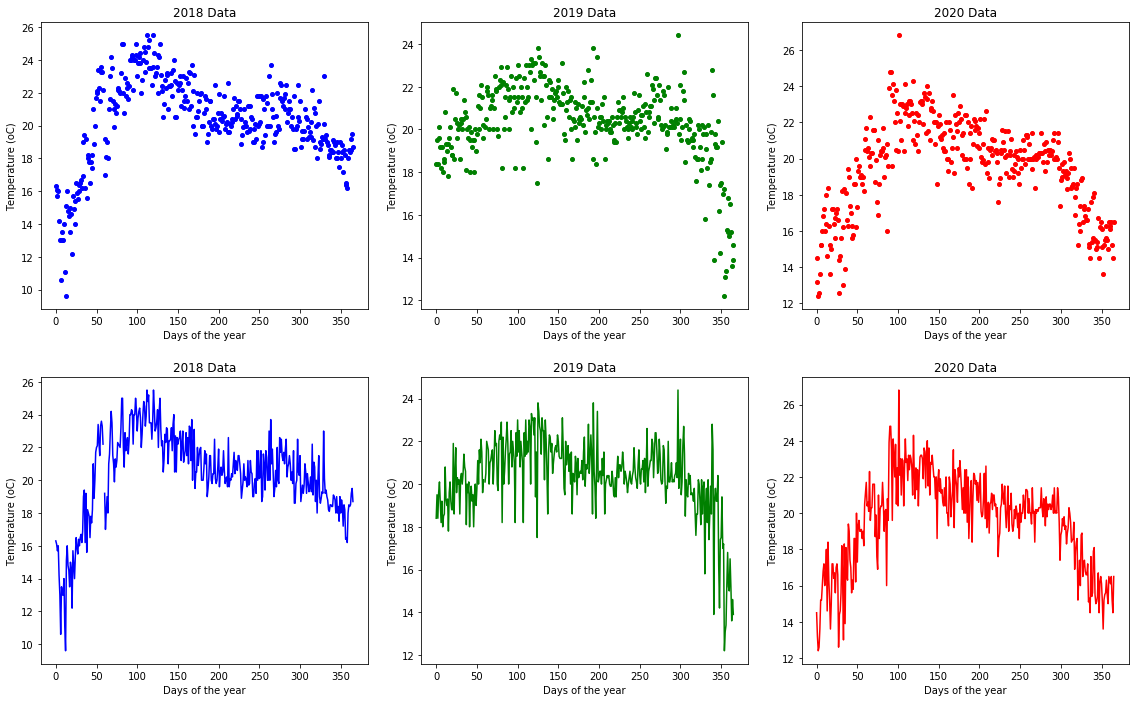

In [24]:
fig,a =  plt.subplots(1,3)

# 2018 Data Plot
plt.subplot(2, 3, 1)
plt.plot(min_temp_df[2018], 'bo', markersize=4)
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

plt.subplot(2, 3, 4)
plt.plot(min_temp_df[2018], 'b-')
plt.title('2018 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

# 2019 Data Plot
plt.subplot(2, 3, 2)
plt.plot(min_temp_df[2019], 'go', markersize=4)
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

plt.subplot(2, 3, 5)
plt.plot(min_temp_df[2019], 'g-')
plt.title('2019 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

# 2020 Data Plot
plt.subplot(2, 3, 3)
plt.plot(min_temp_df[2020], 'ro', markersize=4)
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

plt.subplot(2, 3, 6)
plt.plot(min_temp_df[2020], 'r-')
plt.title('2020 Data')
plt.xlabel('Days of the year')
plt.ylabel('Temperature (oC)')

# Adjust Figure
fig = plt.gcf()
fig.set_size_inches(16, 10)
fig.savefig('images/MinimumTemperaturePlot-AfterCleaning.png', dpi=100)

# Display Plot
plt.tight_layout()
plt.show()